## Exploratory Data Analysis
<div class="alert alert-block alert-info"> In this notebook we will present the Exploratory data analysis

- We do a first assesment of the data set and process as nedded
    
- We summarize the interest data statisctically and visualy
    
    
The information you will have is from the history of air routes. Datasets:

- Date: Flight date.
- Origin_Country : Country of origin.
- Origin_Continent : Continent of origin.
- Destination_Country: Country of destination.
- Destination_Continent: Destination continent.
- Total_flights: Total number of flights.
- Total_seats: Total number of seats.
- Total_ASKs: (Available Seat Kilometer). Target variable. Total seat numbers available by the total number of km these seats have flown.

Our TARGET is **Destination_Country**
   
</div>

In [101]:
# Import basic required libraries
import pandas as pd
import geopandas as gpd
import numpy as np 
import json

## Plotting Libraries
import matplotlib.pyplot as plt
import matplotlib_inline
from IPython.display import Image ##use the IPython Image object to display an Image
##To Plot interactively within an IPython notebook
%matplotlib inline 
import matplotlib.image as mpimg
import seaborn as sns 

from scipy import stats ## to check normality and variance of columns

## Temporal series
from statsmodels.tsa.seasonal import seasonal_decompose

## Choropleth map
import folium
import pycountry 
import mapclassify

## Ignore warnings
import warnings
warnings.filterwarnings('ignore')

<div class="alert alert-success">

<b>- Exploration of the dataset</b>
    

</div>

In [2]:
df = pd.read_csv('train_NEW.csv')
df.head()

,Date,Origin Country,Origin Continent,Destination Country,Destination Continent,Total flights,Total seats,Total ASKs
0,Jul 2009,United Kingdom,Europe,13,Europe,"9,032","1,531,683","2,447,559,137"
1,Apr 2008,Lebanon,Middle East,9,Europe,5,760,"2,389,940"
2,Apr 2005,Switzerland,Europe,11,Europe,"1,471","158,661","66,533,450"
3,Aug 2016,Israel,Middle East,19,Europe,117,"23,366","61,557,637"
4,Feb 2019,Albania,Europe,8,Europe,80,"12,854","9,837,347"


In [3]:
## Printing the shape of the df
print(df.shape)

## Showing df information
df.info()

(276982, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276982 entries, 0 to 276981
Data columns (total 8 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   Date                   276982 non-null  object
 1   Origin Country         276982 non-null  object
 2   Origin Continent       276982 non-null  object
 3   Destination Country    276982 non-null  int64 
 4   Destination Continent  276982 non-null  object
 5   Total flights          276982 non-null  object
 6   Total seats            276982 non-null  object
 7   Total ASKs             276982 non-null  object
dtypes: int64(1), object(7)
memory usage: 16.9+ MB


<div class="alert alert-success">

- We observe:
    - The dataframe has 276982 rows and 8 columns
    - No null data
    - All columns are objects except *Destination Country*, which is an integer

- We want performe:
    - Change Date column to date/Time format
    - Change *Total flights*, *Total seats* and *Total ASKs* to float numbers
    - and finally, I want to decode the Destination countries to performe the EDA better.



</div>

In [4]:
# Convert the 'Date' column to datetime indicating the format in the same column Date
df['Date'] = pd.to_datetime(df['Date'], format='%b %Y')
## But with this we get also a day 01 which is not true
## We creat a column for the Year
df['Year'] = df['Date'].dt.year
## A column for the month
df['Month'] = df['Date'].dt.month
## Drope the column Date
df = df.drop(columns = ['Date'], axis = 1)

## and finally, reorganize the columns so the Year and Month appears at the begining
df_columns = df.columns.to_list()
df = df[df_columns[-2:] + df_columns[:-2]]

## display the result   
df


,Year,Month,Origin Country,Origin Continent,Destination Country,Destination Continent,Total flights,Total seats,Total ASKs
0,2009,7,United Kingdom,Europe,13,Europe,"9,032","1,531,683","2,447,559,137"
1,2008,4,Lebanon,Middle East,9,Europe,5,760,"2,389,940"
2,2005,4,Switzerland,Europe,11,Europe,"1,471","158,661","66,533,450"
3,2016,8,Israel,Middle East,19,Europe,117,"23,366","61,557,637"
4,2019,2,Albania,Europe,8,Europe,80,"12,854","9,837,347"
...,...,...,...,...,...,...,...,...,...
276977,2012,7,Iraq,Middle East,21,Europe,4,744,"2,635,372"
276978,2007,6,Cyprus,Europe,4,Europe,64,"9,519","19,409,611"
276979,2007,9,Panama,Central America,17,North America,442,"63,061","161,243,990"
276980,2015,11,Russian Federation,Europe,9,Europe,90,"13,422","30,147,391"


In [5]:
## Converting the string/number columns to float

## We do it with a for loop
## We first get again the df_columns list
df_columns = df.columns
## We do the loop for the last 3 columns, the ones we want to convert to float (-3)
for column in df_columns[-3:]: 
    ## Replacing the comma for an empty space
    df[column] = df[column].str.replace(',', '') 
    ## Converting  each column to float and filling nanas with 0
    df[column] = pd.to_numeric(df[column], errors='coerce').fillna(0).astype(float)
## display the result    
df

,Year,Month,Origin Country,Origin Continent,Destination Country,Destination Continent,Total flights,Total seats,Total ASKs
0,2009,7,United Kingdom,Europe,13,Europe,9032.0,1531683.0,2.447559e+09
1,2008,4,Lebanon,Middle East,9,Europe,5.0,760.0,2.389940e+06
2,2005,4,Switzerland,Europe,11,Europe,1471.0,158661.0,6.653345e+07
3,2016,8,Israel,Middle East,19,Europe,117.0,23366.0,6.155764e+07
4,2019,2,Albania,Europe,8,Europe,80.0,12854.0,9.837347e+06
...,...,...,...,...,...,...,...,...,...
276977,2012,7,Iraq,Middle East,21,Europe,4.0,744.0,2.635372e+06
276978,2007,6,Cyprus,Europe,4,Europe,64.0,9519.0,1.940961e+07
276979,2007,9,Panama,Central America,17,North America,442.0,63061.0,1.612440e+08
276980,2015,11,Russian Federation,Europe,9,Europe,90.0,13422.0,3.014739e+07


In [6]:
## read the JSON file into a dictionary
with open('encode_countries.json', 'r') as f:
    encodedCountries = json.load(f)

## create a reverse mapping from code to country name
reverse_mapping = {v: k for k, v in encodedCountries.items()}

## use the reverse mapping to add a new column with the country names
df['Destination Country_Name'] = df['Destination Country'].map(reverse_mapping)

## and finally, reorganize the columns so the destination country name appears before its code number
df_columns = df.columns.to_list()
df = df[df_columns[:-6] + df_columns[-1:] + df_columns[-6:-1]]

## display the result
df 


,Year,Month,Origin Country,Origin Continent,Destination Country_Name,Destination Country,Destination Continent,Total flights,Total seats,Total ASKs
0,2009,7,United Kingdom,Europe,Spain,13,Europe,9032.0,1531683.0,2.447559e+09
1,2008,4,Lebanon,Middle East,Belgium,9,Europe,5.0,760.0,2.389940e+06
2,2005,4,Switzerland,Europe,France,11,Europe,1471.0,158661.0,6.653345e+07
3,2016,8,Israel,Middle East,Czech Republic,19,Europe,117.0,23366.0,6.155764e+07
4,2019,2,Albania,Europe,Turkey,8,Europe,80.0,12854.0,9.837347e+06
...,...,...,...,...,...,...,...,...,...,...
276977,2012,7,Iraq,Middle East,Netherlands,21,Europe,4.0,744.0,2.635372e+06
276978,2007,6,Cyprus,Europe,Austria,4,Europe,64.0,9519.0,1.940961e+07
276979,2007,9,Panama,Central America,United States,17,North America,442.0,63061.0,1.612440e+08
276980,2015,11,Russian Federation,Europe,Belgium,9,Europe,90.0,13422.0,3.014739e+07


<div class="alert alert-success">
<b>Exploratory data analysis (EDA) of the data set</b>


1.1. Univariate Analysis:

- We start by exploring each variable getting information and generating summary statistics 
- We create boxplots and histograms to visualize the distribution of each numerical variable.
- Create bar plots to visualize the frequency of each category in categorical variables.
    
1.2. and 1.3 Bivariate and Multivariate Analysis

- We create a heatmap to visualize the correlations between all the variables.
- We creat pairwise correlation between the numerical variables to identify any relationships between them.
- Create scatter plots to visualize the relationship between each pair of numerical variables.
- Create bar plots to visualize the relationship between each pair of categorical variables.
- We finally plotted in heatmaps the relationship between Origin and Destination Countries

1.4. Time Series Analysis:
- Create line plots to visualize the trends in "Total flights", "Total seats", and "Total ASKs" over time, aggregated by year and/or month.
- Check for seasonality and trend in the time series data.

1.5. Geographical Analysis:

- Create a choropleth map to visualize the distribution of flights based on "Origin Country" and "Destination Country".


</div>

<div class="alert alert-success">
<b>1. Univariate Analysis:</b>

- We start by exploring each variable getting information and generating summary statistics 
- We create boxplots and histograms to visualize the distribution of each numerical variable.
- Create bar plots to visualize the frequency of each category in categorical variables.
    
</div>

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276982 entries, 0 to 276981
Data columns (total 10 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Year                      276982 non-null  int64  
 1   Month                     276982 non-null  int64  
 2   Origin Country            276982 non-null  object 
 3   Origin Continent          276982 non-null  object 
 4   Destination Country_Name  276982 non-null  object 
 5   Destination Country       276982 non-null  int64  
 6   Destination Continent     276982 non-null  object 
 7   Total flights             276982 non-null  float64
 8   Total seats               276982 non-null  float64
 9   Total ASKs                276982 non-null  float64
dtypes: float64(3), int64(3), object(4)
memory usage: 21.1+ MB


In [8]:
df.describe().round(0)

,Year,Month,Destination Country,Total flights,Total seats,Total ASKs
count,276982.0,276982.0,276982.0,276982.0,276982.0,2.769820e+05
mean,2012.0,7.0,11.0,1047.0,133819.0,2.358584e+08
std,5.0,3.0,7.0,19234.0,2064223.0,2.715133e+09
min,2004.0,1.0,0.0,1.0,0.0,0.000000e+00
25%,2008.0,4.0,5.0,22.0,3952.0,1.032896e+07
50%,2012.0,7.0,11.0,59.0,11005.0,3.528862e+07
75%,2016.0,10.0,17.0,195.0,36943.0,1.078723e+08
max,2020.0,12.0,24.0,902944.0,89374179.0,1.303134e+11


In [9]:
## Printing number of labels in categorical data
print('Origin Country unique: ', df['Origin Country'].nunique())
print('Origin Continent unique: ', df['Origin Continent'].nunique())
print('Destination Country Name unique: ', df['Destination Country_Name'].nunique())
print('Destination Country unique: ', df['Destination Country'].nunique())
print('Destination Continent unique: ', df['Destination Continent'].nunique())

Origin Country unique:  214
Origin Continent unique:  9
Destination Country Name unique:  25
Destination Country unique:  25
Destination Continent unique:  5


In [98]:
# Define a function to check normality
## For checking normality, I used Shapiro-Wilk’s W test which is generally preferred for 
## smaller samples however there are other options like Kolmogorov-Smirnov and D’Agostino and Pearson’s test. 
def check_normality(data):
    test_stat_normality, p_value_normality=stats.shapiro(data)
    #print("p value:%.6f" % p_value_normality)
    if p_value_normality <0.05:
        text  = "Reject null hypothesis >> The data is not normally distributed"
        ##print("Reject null hypothesis >> The data is not normally distributed")
    else:
        text = "Fail to reject null hypothesis >> The data is normally distributed"
        ##print("Fail to reject null hypothesis >> The data is normally distributed")
    return text, p_value_normality

##Function to plot the distribution and a boxplot for each column with a loop
#Introduce the df, df[['CRIM', 'ZN']]
##It alsdo includes in the plot the normality test
def plotsPreProcessing(df):
    for column in df:
        text = check_normality(df[column])
        fig, axes = plt.subplots(1,2, figsize = (15,5))
        fig.suptitle('OUTLIERS AND DISTRIBUTION OF COLUMN' + '\n\n' + text[0] + '   p_value =' + str(round(text[1], 4)))
        sns.histplot(ax=axes[1], data=df, x=df[column], bins=15, color='orange', kde= True)
        sns.boxplot(ax=axes[0], x =df[column])

<div class="alert alert-success">
<b></b>

- We use the upper functions to plot a boxplot and a histogrsam with the distribution of the numerical variables.
- it is also plotted if the distribution is Normal or Not and the p-value obtained with the Shapiro-Wilk’ test with an alpha = 0.05

- It is worth noting that the warnings have been deactivated, and the Shapiro-Wilk’s W test is flashing a warning due to low performance of the test with samples bigger than 5000. 
In that matters, after looking for better performances tests, and finding very few or none, we decided that although the warning, keep having this information and take an accurate look to the plots to see if the distribution might be different from what the test shows. 

    
</div>

In [111]:
df_columns = df.columns
df_columns

Index(['Year', 'Month', 'Origin Country', 'Origin Continent',
       'Destination Country_Name', 'Destination Country',
       'Destination Continent', 'Total flights', 'Total seats', 'Total ASKs'],
      dtype='object')

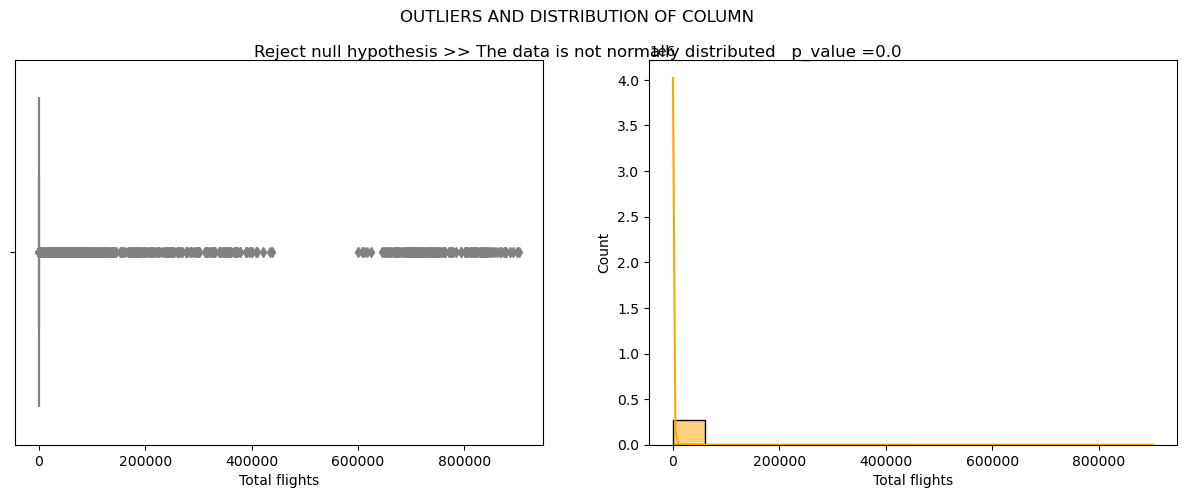

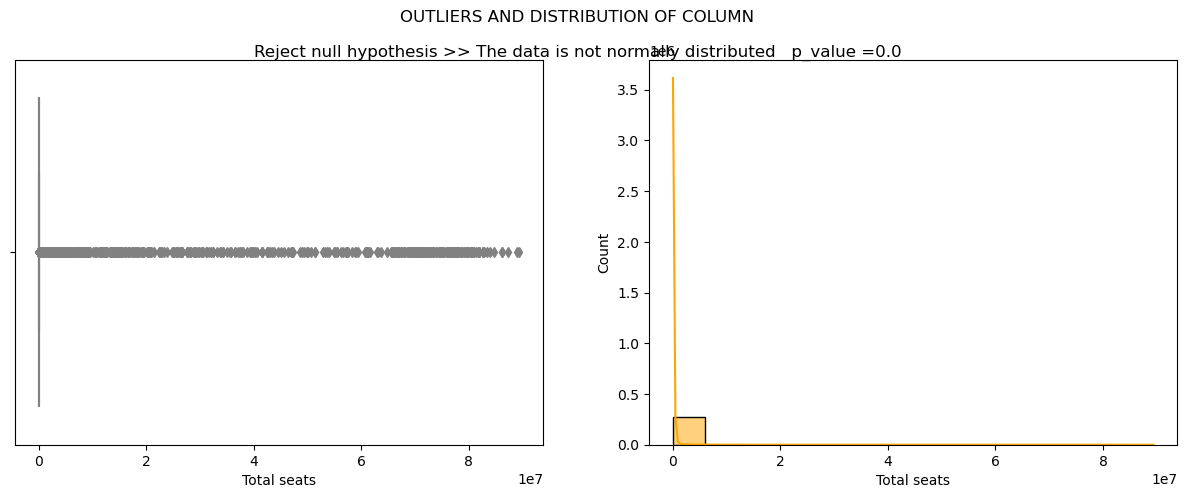

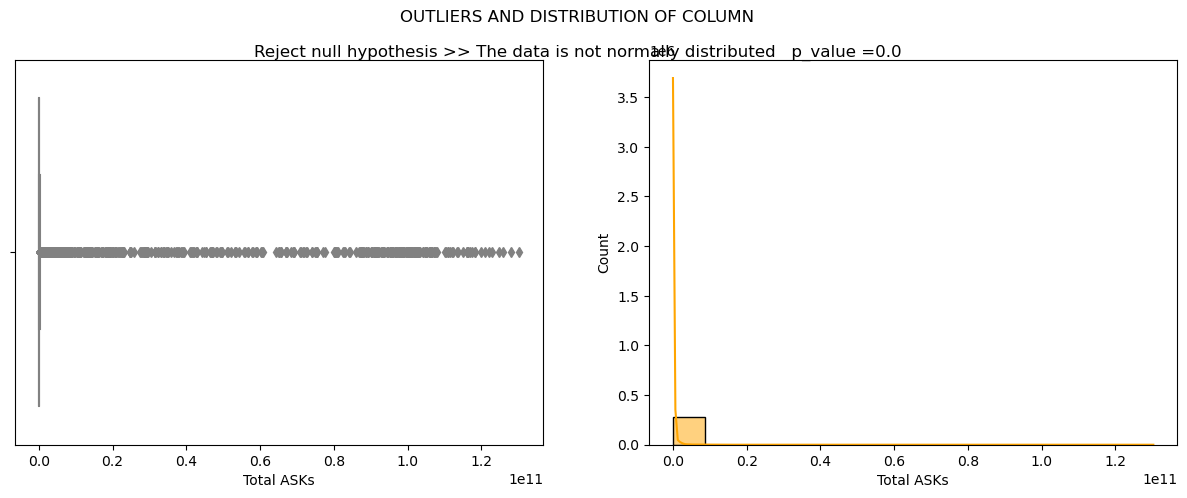

In [110]:
## Check the boxplot distribution and histogram of the numerical variables
## In this plots it is also shown the Normality test and p-value 
plotsPreProcessing(df[df_columns[-3:]])

<div class="alert alert-success">
<b></b>

- We see that the **numerical variables** have all outliers and a right skewed distribution that as p-value suggests is not Normally distributed.
    
</div>

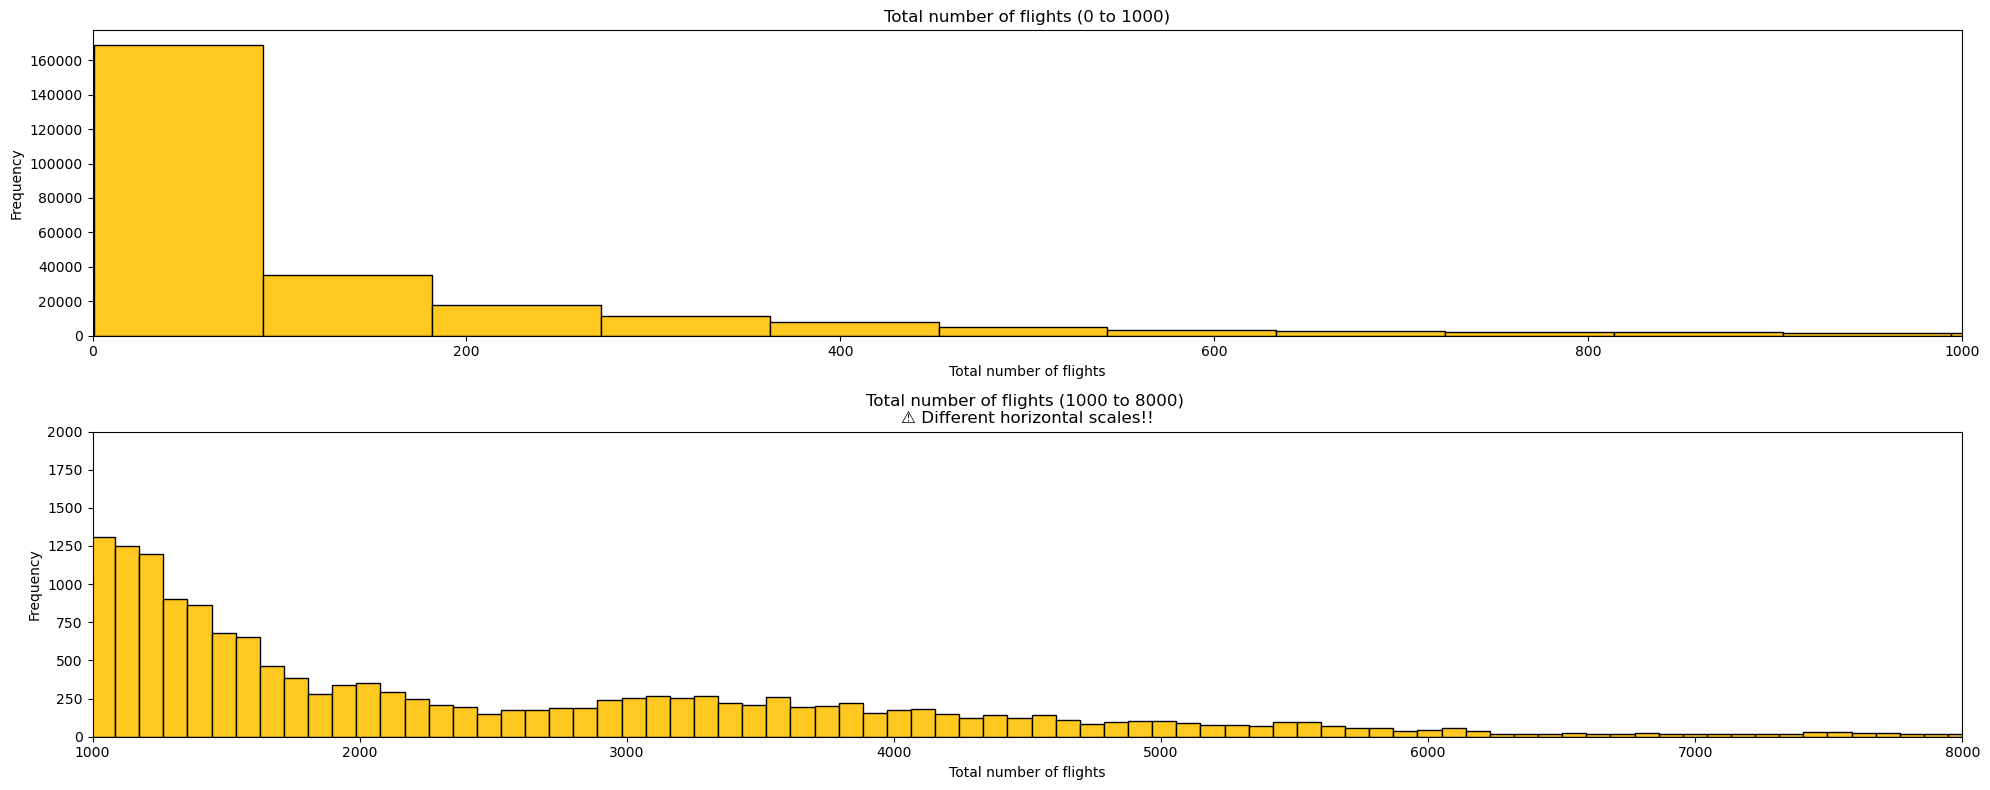

In [124]:
## Figure to plot the total number of flights
## We separate in 2 subplots in order to see properly the distribution

## Creat the figure with 2 subplots
fig, ax = plt.subplots(2,1, figsize=(20,8))

## Create the first subplot
ax[0].hist(df["Total flights"], bins=10000, edgecolor='black', color='#ffc922')
ax[0].set_xlim([0,1000])
ax[0].set_title('Total number of flights (0 to 1000)')
ax[0].set_xlabel('Total number of flights')
ax[0].set_ylabel('Frequency')

## Create the second subplot
ax[1].hist(df["Total flights"], bins=10000, edgecolor='black', color='#ffc922')
ax[1].set_xlim([1000,8000])
ax[1].set_ylim([0,2000])
ax[1].set_title('Total number of flights (1000 to 8000) \n⚠️ Different horizontal scales!!')
ax[1].set_xlabel('Total number of flights')
ax[1].set_ylabel('Frequency')

## Adjust the subplots to fit in the figure
plt.tight_layout()  
## Display results
plt.show()

<div class="alert alert-success">
<b></b>

- We also check some groups of data to see which is the most frequent Origin Country, Destination Country and Destination Continent and plot them.
    
    
</div>

In [113]:
## Most frequent Origin Country flights
df.groupby(['Origin Country']).sum().sort_values(by = 'Total flights', ascending=False).head(20)


,Year,Month,Destination Country,Total flights,Total seats,Total ASKs
Origin Country,,,,,,
United States,7818365,25345,45099,126523796.0,1.297860e+10,2.054236e+13
China,7115782,23112,40223,37949813.0,5.968341e+09,7.988385e+12
Canada,6117363,20012,33553,13681338.0,1.017665e+09,1.742937e+12
United Kingdom,8261244,26763,48694,10941089.0,1.488313e+09,3.013796e+12
Germany,8555072,27710,49310,10315612.0,1.479644e+09,2.358876e+12
India,6098585,19710,33633,9227156.0,1.436552e+09,1.894546e+12
Spain,7491199,24322,44645,9157710.0,1.363638e+09,1.752129e+12
France,8408335,27205,49380,7838206.0,1.045849e+09,1.489321e+12
Italy,7953737,25566,46111,7382694.0,1.096775e+09,1.210730e+12


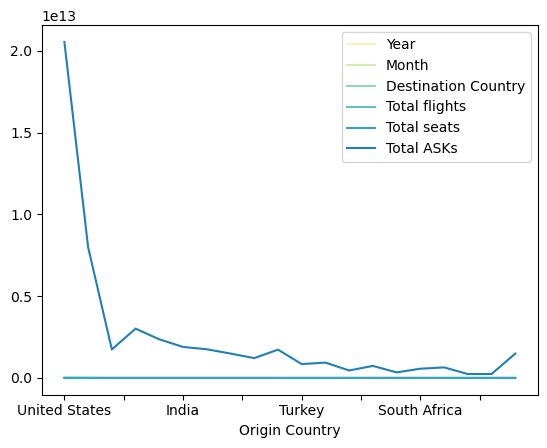

In [114]:
## Most frequent Origin Country flights
df.groupby(['Origin Country']).sum().sort_values(by = 'Total flights', ascending=False).head(20).plot();

In [116]:
## Most frequent Origin Continent flights
df.groupby(['Origin Continent']).sum().sort_values(by = 'Total flights', ascending=False)

,Year,Month,Destination Country,Total flights,Total seats,Total ASKs
Origin Continent,,,,,,
North America,18002562,58510,105170,141913375.0,1.423313e+10,2.293251e+13
Europe,232278358,754306,1334061,76086022.0,1.079122e+10,1.645929e+13
Asia,107783507,347937,530714,58657738.0,9.633782e+09,1.733310e+13
Africa,87522112,283236,495180,5267289.0,7.932832e+08,2.106441e+12
Middle East,60685847,195833,332336,4470486.0,9.789644e+08,3.137091e+12
Caribbean,23968072,76794,178199,1865226.0,2.635020e+08,8.269643e+11
South America,15942944,51582,111284,828957.0,1.933957e+08,1.383801e+12
Central America,4901781,15895,38503,520252.0,8.321887e+07,2.407062e+11
Australasia,6254804,20177,45575,328046.0,9.483886e+07,9.086269e+11


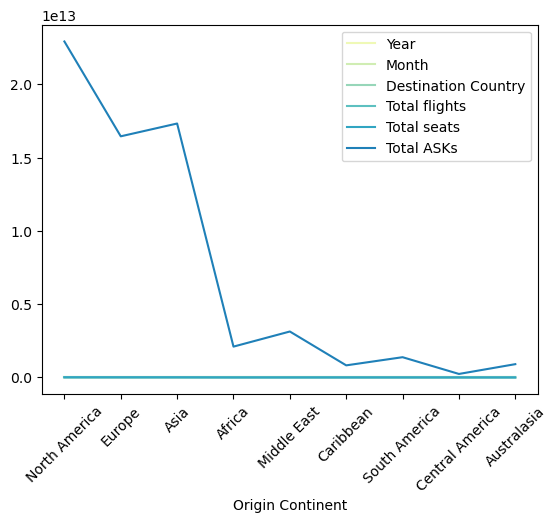

In [119]:
## Most frequent Origin Continent flights
df.groupby(['Origin Continent']).sum().sort_values(by = 'Total flights', ascending=False).plot()
plt.xticks(rotation=45);

In [120]:
## Most frequent Desrtination Country flights
df.groupby(['Destination Country']).sum().sort_values(by = 'Total flights', ascending=False).head(20)

,Year,Month,Total flights,Total seats,Total ASKs
Destination Country,,,,,
17,32318771,104560,131484130.0,1.381130e+10,2.442581e+13
0,20165852,65372,40752486.0,6.518840e+09,9.099257e+12
18,19633032,63473,14266409.0,1.116013e+09,2.255863e+12
15,32429393,104766,13403112.0,1.922421e+09,4.264514e+12
5,31955999,103041,12268249.0,1.780488e+09,3.230014e+12
13,23287729,75857,10151706.0,1.542972e+09,2.450853e+12
1,16712774,54104,10049555.0,1.593915e+09,2.338816e+12
11,36342045,117813,9399303.0,1.320546e+09,2.583095e+12
7,26822109,86343,8374954.0,1.250605e+09,1.581257e+12


<div class="alert alert-success">
<b></b>

- The most frequent origin country is the USA, and logically the most frequent Origin continent is North America.
    
    
</div>

In [122]:
## Most frequent Destination Continent flights
df.groupby(['Destination Continent']).sum().sort_values(by = 'Total flights', ascending=False)

,Year,Month,Destination Country,Total flights,Total seats,Total ASKs
Destination Continent,,,,,,
North America,51951803,168033,448679,145750539.0,1.492731e+10,2.668167e+13
Europe,349334987,1131204,1954955,79204796.0,1.148150e+10,2.035683e+13
Asia,63510494,205481,215578,56653117.0,9.119462e+09,1.362232e+13
Africa,46500358,150384,290048,4580779.0,6.425408e+08,1.374400e+12
Middle East,46042345,149168,261762,3748160.0,8.945200e+08,3.293309e+12


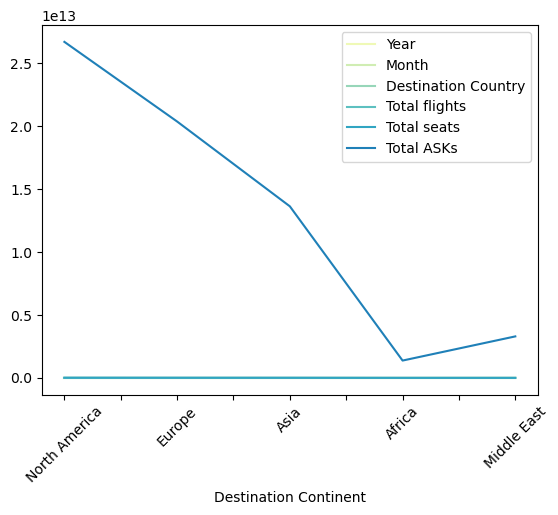

In [123]:
## Most frequent Destination Continent flights
df.groupby(['Destination Continent']).sum().sort_values(by = 'Total flights', ascending=False).plot()
plt.xticks(rotation=45);

<div class="alert alert-success">
<b></b>

- The most frequent destination continent is north America as well. As is the USA, and logically the most frequent Origin continent is North America.
    
    
</div>

<div class="alert alert-success">
<b>2 and 3. Bivariate and Multivariate Analysis</b>

- We create a heatmap to visualize the correlations between all the variables.
- We creat pairwise correlation between the numerical variables to identify any relationships between them.
- Create scatter plots to visualize the relationship between each pair of numerical variables.
- Create bar plots to visualize the relationship between each pair of categorical variables.
- We finally plotted in heatmaps the relationship between Origin and Destination Countries

    
</div>

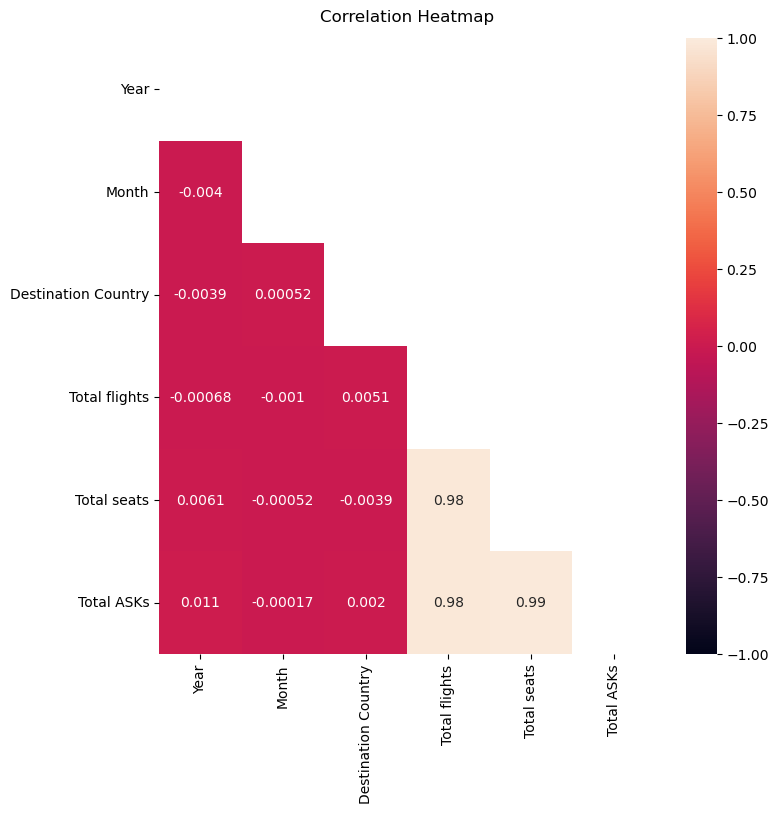

In [10]:
##Correlation matrix heatmap
##Figure size:
plt.figure(figsize=(8,8))

# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(df.corr()))
heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True);
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

<div class="alert alert-success">
<b></b>
    
- We observe correltion between the numerical features total number of flights, seats and ASKs
    
- There is no correlation btween the other features
    
</div>

In [11]:
df_columns = df.columns
df_columns

Index(['Year', 'Month', 'Origin Country', 'Origin Continent',
       'Destination Country_Name', 'Destination Country',
       'Destination Continent', 'Total flights', 'Total seats', 'Total ASKs'],
      dtype='object')

<div class="alert alert-success">
<b></b>
- We creat a joint plot to see relationship between total flights and total seats
    
</div>

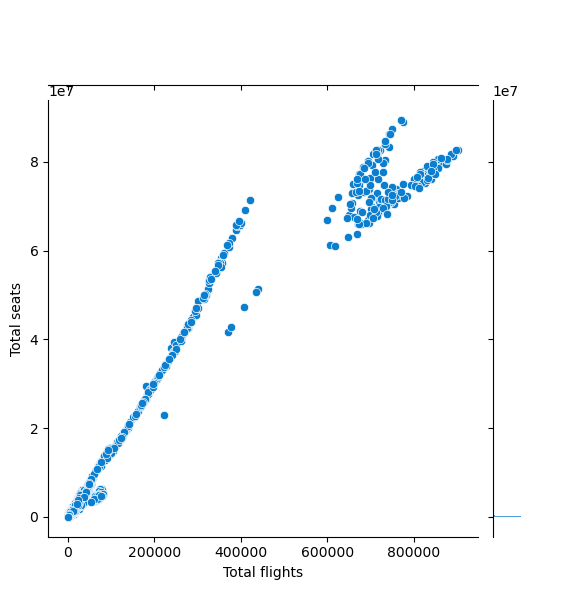

In [81]:
## Joint plot to see relationship between Total flights and total seats
sns.jointplot(x = 'Total flights', y = 'Total seats', data = df, color='#0C7ECF')
# Set the x and y limits
plt.xlim(0, 1000)
#plt.ylim(0, 5000)
plt.show()

<div class="alert alert-success">
<b></b>
    
- We observe a very curious pattern
   
</div>

<div class="alert alert-success">
<b></b>
    
- We plot frequency of Origin and destination country colored by continet
- and we plot again frequency of origin and destination continents.
   
</div>

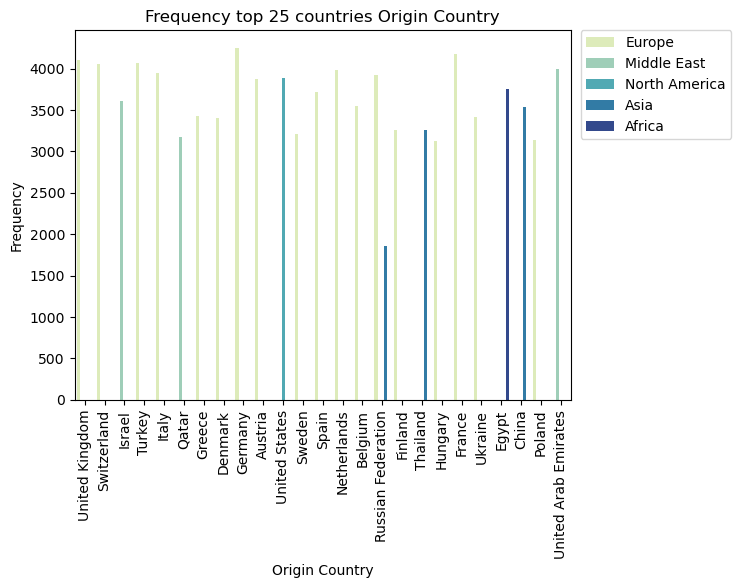

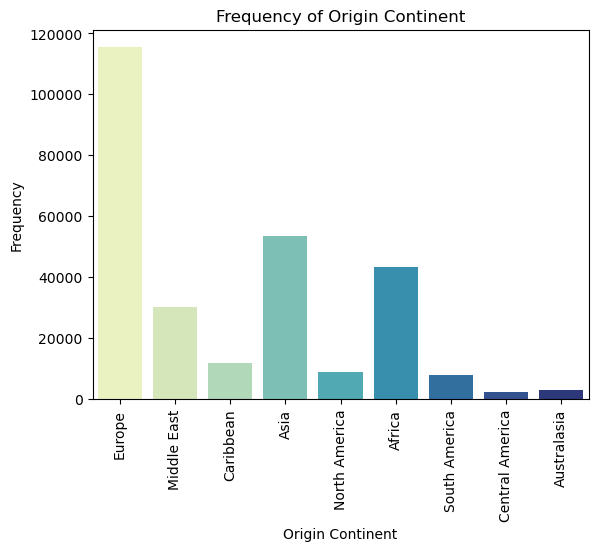

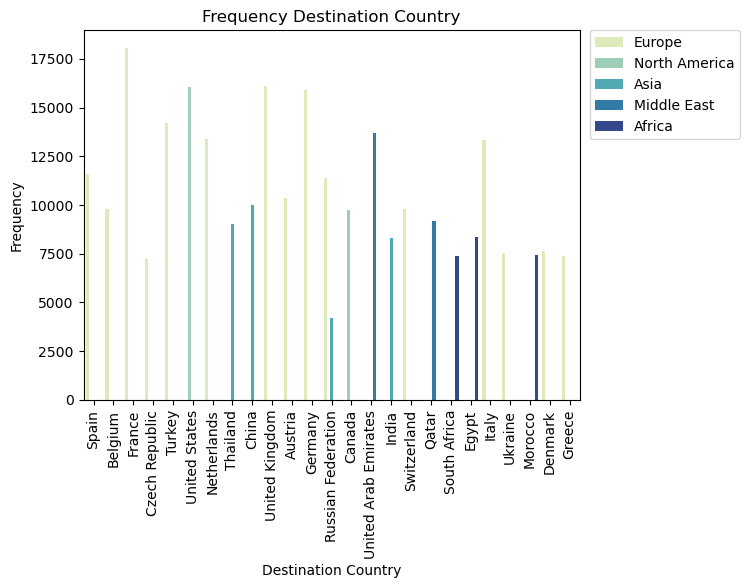

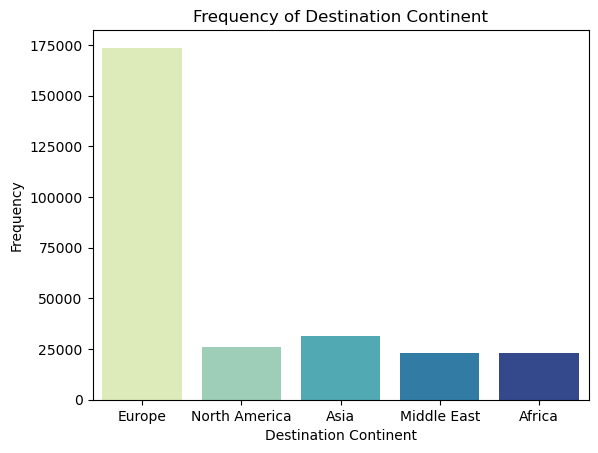

In [40]:
## Create a bar plot to show the frequency of each category in "Origin Country"

## Set the color palette to go from light yellow to blue
sns.set_palette(sns.color_palette("YlGnBu", 8))


## Get the top 10 countries with the highest frequency
top_countries = df["Origin Country"].value_counts().nlargest(25).index

## Create a bar plot to show the frequency of each of the top 25 countries in "Origin Country"
sns.countplot(x="Origin Country", data=df[df["Origin Country"].isin(top_countries)], hue= 'Origin Continent', palette="YlGnBu")
plt.xlabel("Origin Country")
plt.ylabel("Frequency")
plt.title("Frequency top 25 countries Origin Country")
plt.xticks(rotation=90)
#place legend outside top right corner of plot
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

## Create a bar plot to show the frequency of each category in "Origin Continent"
sns.countplot(x="Origin Continent", data=df, palette="YlGnBu")
plt.xlabel("Origin Continent")
plt.ylabel("Frequency")
plt.title("Frequency of Origin Continent")
plt.xticks(rotation=90)
plt.show()

## Create a bar plot to show the frequency of each category in "Destination Country"
sns.countplot(x="Destination Country_Name", data=df, hue= 'Destination Continent', palette="YlGnBu")
plt.xlabel("Destination Country")
plt.ylabel("Frequency")
plt.title("Frequency Destination Country")
plt.xticks(rotation=90)
#place legend outside top right corner of plot
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

## Create a bar plot to show the frequency of each category in "Destination Continent"
sns.countplot(x="Destination Continent", data=df, palette="YlGnBu")
plt.xlabel("Destination Continent")
plt.ylabel("Frequency")
plt.title("Frequency of Destination Continent")
plt.show()

<div class="alert alert-success">
<b></b>
    
- Before we were plotting the the Origin and destination countries and continents ordered by total number of flights.
- Here, we show, the frequency of appearance colored by continent
- We observe that the two of them are different.
- Per total number of fligth, the most frequent country is USA in North America
- Per frequency of appearans the most frequent origin country is France, and most frequent Continent, both of origin and destination is Europe.
   
</div>

<div class="alert alert-success">
<b> Correlation between the flights for each combination of origin country and destination country</b>
    
- We create a heatmap with a pivot table of the top 25 destination countries with the counts of flights for each combination of origin country and destination country. 
    
</div>


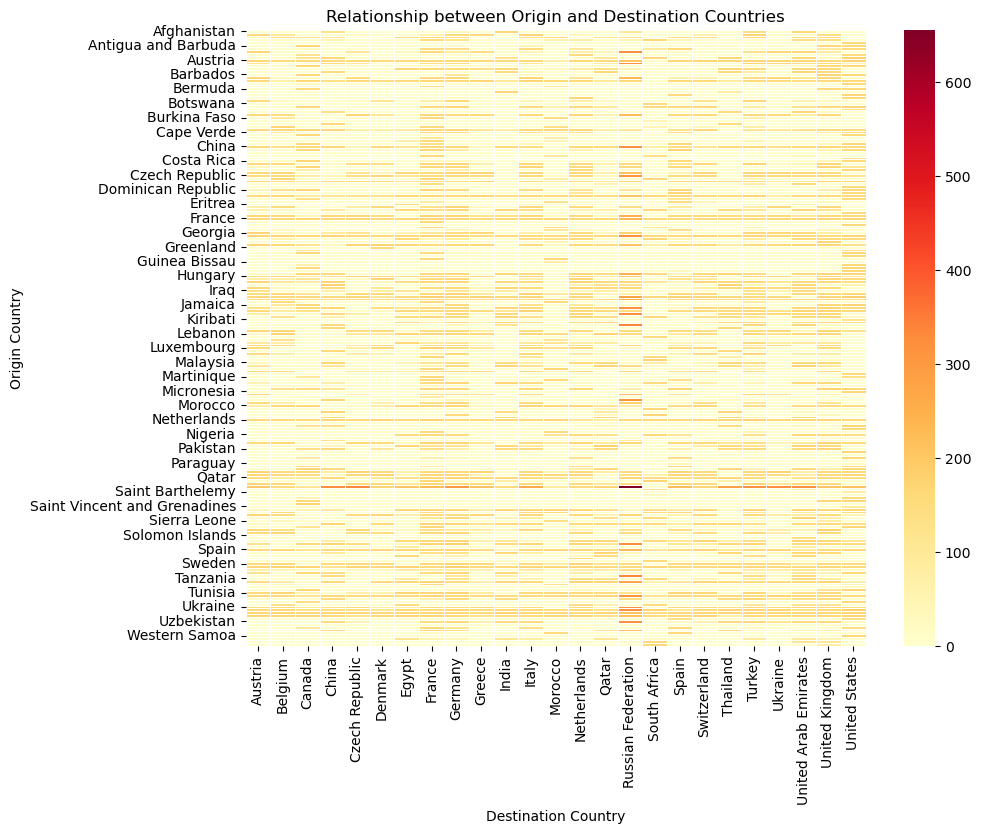

In [43]:
## Figure to plot the relationship between Origin and destination Countries

##Figure size:
plt.figure(figsize=(10,8))

# Get the frequency of each combination of origin and destination countries
ctab = pd.crosstab(df["Origin Country"], df["Destination Country_Name"])

# Create the plot to show the relationship between origin country and destination countries with a heatmanp
sns.heatmap(ctab, cmap="YlOrRd", cbar=True, annot=False, fmt="d", linewidths=0.5)
plt.xlabel("Destination Country")
plt.ylabel("Origin Country")
plt.title("Relationship between Origin and Destination Countries")
plt.show()

<div class="alert alert-success">
<b> </b>
    
- We observe that this heatmap has to much information and we want to focus it, so we do the same with the top 25 destination countries
    
</div>

<div class="alert alert-success">
<b> Correlation between the top 25 destination countries flights for each combination of origin country and destination country</b>
    
- Here we reproduce the same for the top 25 destination countries 
    
</div>


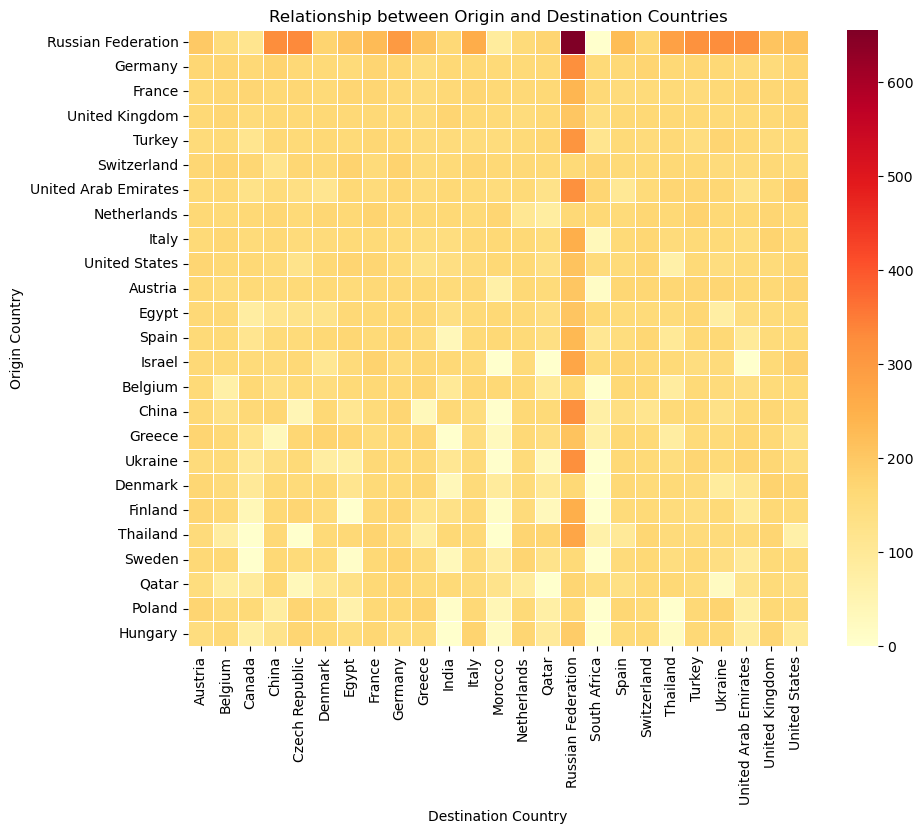

In [56]:
##Figure size:
plt.figure(figsize=(10,8))

## Create a pivot table ctab with the counts of flights for each combination of origin country and destination country
ctab = pd.crosstab(df['Origin Country'], df['Destination Country_Name'])

## Create a separate Series sum_flights with the sum of flights for each origin country
sum_flights = ctab.sum(axis=1)

## Sort the sum_flights Series and keep only the top 25 origin countries, update the pivot table ctab accordingly
ctab = ctab.loc[sum_flights.sort_values(ascending=False).index[:25]]

## Keep only the top 25 destination countries
ctab = ctab.iloc[:, :25]

## Create a heatmap using the YlOrRd color map from the seaborn library
sns.heatmap(ctab, cmap='YlOrRd', linewidths=0.5)
plt.xlabel("Destination Country")
plt.ylabel("Origin Country")
plt.title("Relationship between Origin and Destination Countries")
plt.show()

<div class="alert alert-success">
<b> </b>
    
- With the top 25 countries we observe that Russian federation produces an anomaly, probably due to its huge extension it has much more flights than the rest

- So, we try to extract it and see if the information pops up
    
</div>

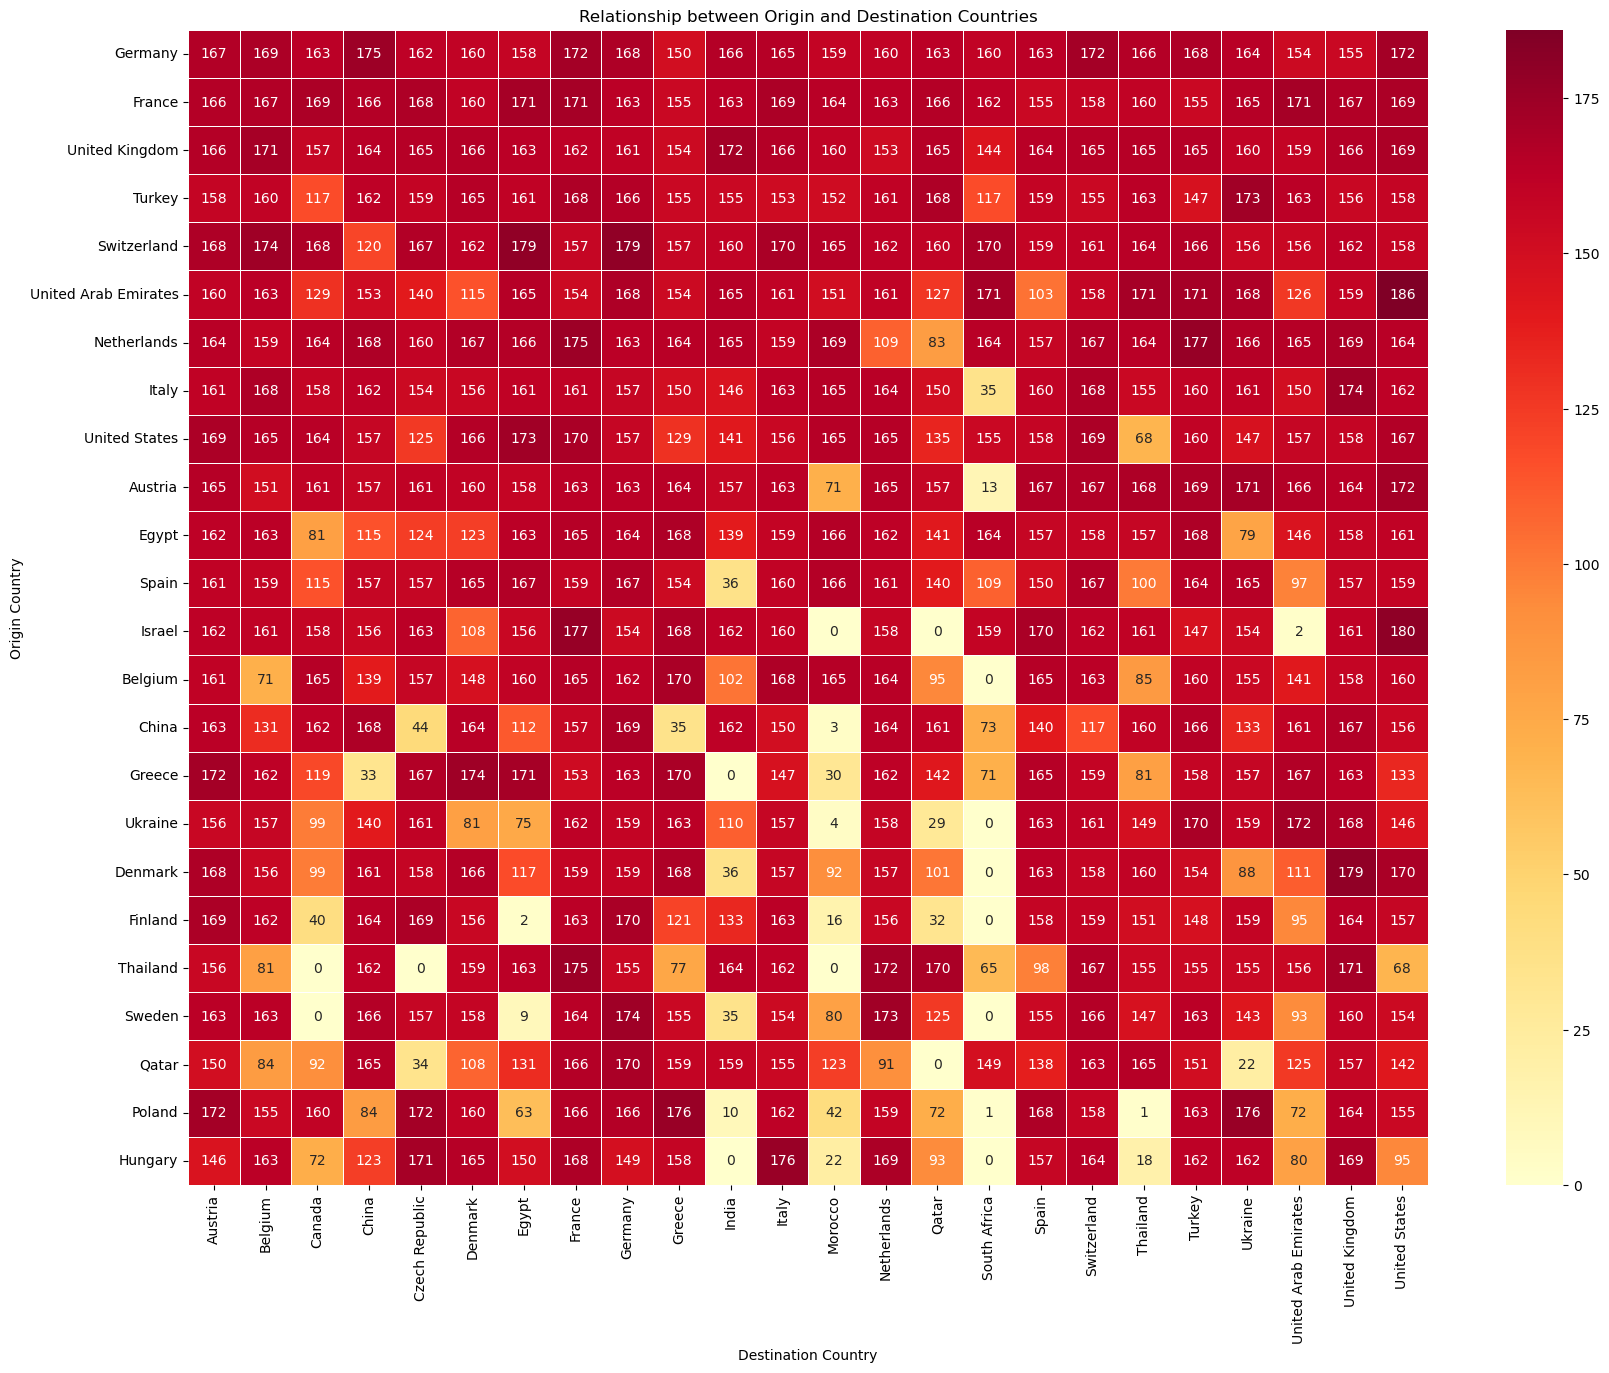

In [91]:
##Figure size:
plt.figure(figsize=(20,15))

## Create a pivot table ctab with the counts of flights for each combination of origin country and destination country
ctab = pd.crosstab(df['Origin Country'], df['Destination Country_Name'])

## Create a separate Series sum_flights with the sum of flights for each origin country
sum_flights = ctab.sum(axis=1)

## Sort the sum_flights Series and keep only the top 25 origin countries, update the pivot table ctab accordingly
ctab = ctab.loc[sum_flights.sort_values(ascending=False).index[:25]]

## Keep only the top 25 destination countries
ctab = ctab.iloc[:, :25]

## Exclude the origin and destination country 'Russia Federation'
ctab = ctab[ctab.index != 'Russian Federation']
ctab = ctab.loc[:, ctab.columns != 'Russian Federation']

## Create a heatmap using the YlOrRd color map from the seaborn library
sns.heatmap(ctab, cmap='YlOrRd', linewidths=0.5, annot=True, fmt="")
plt.xlabel("Destination Country")
plt.ylabel("Origin Country")
plt.title("Relationship between Origin and Destination Countries")
plt.show()

<div class="alert alert-success">
<b> </b>
    
- Finally in this figure we can observe a bigger range of data.
    
- The image has a lot of information, the cells with redish colors, indiate that between these two countryes, the one in the x and the one in the y, there are many flights, while the cels with pale yellow color has almos non flight
 
  
- As an example, we can see that between Italy and Hungary there are a lot of flights while between the between South Africa and Hungary, none.
    
- With this image we can get an idea of which are the most frequen routes. 
    
</div>

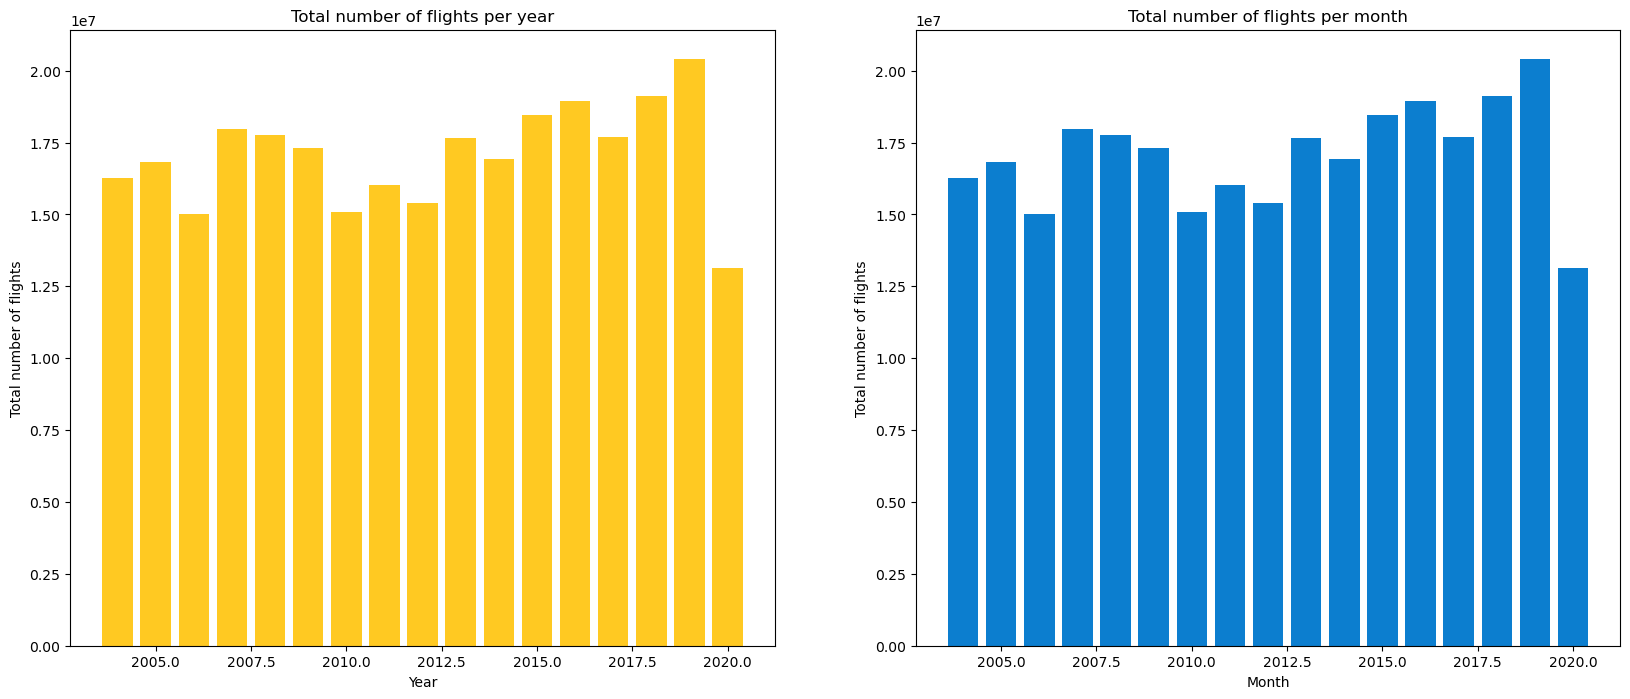

In [125]:
# Group the data by year and month
grouped_by_year = df.groupby("Year").sum()["Total flights"]
grouped_by_month = df.groupby("Month").sum()["Total flights"]



fig, ax = plt.subplots(1,2,figsize=(20,8))

# Plot the data as a bar chart for years
ax[0].bar(grouped_by_year.index, grouped_by_year.values, color='#ffc922')
ax[0].set_title('Total number of flights per year')
ax[0].set_ylabel('Total number of flights')
ax[0].set_xlabel('Year')
# Plot the data as a bar chart for months
ax[1].bar(grouped_by_year.index, grouped_by_year.values, color='#0C7ECF')
ax[1].set_title('Total number of flights per month')
ax[1].set_ylabel('Total number of flights')
ax[1].set_xlabel('Month')
## Display result
plt.show()

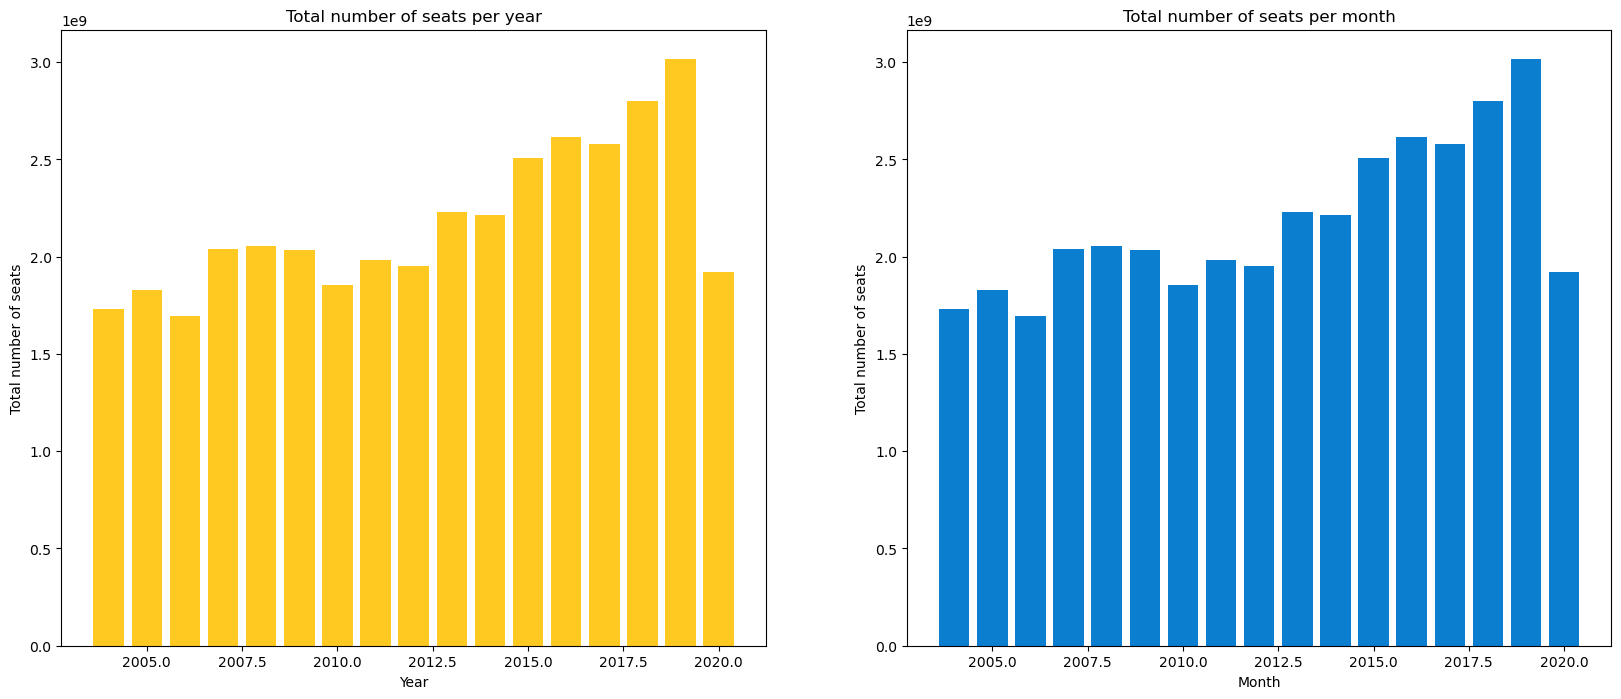

In [126]:
# Group the data by year and month
grouped_by_year = df.groupby("Year").sum()["Total seats"]
grouped_by_month = df.groupby("Month").sum()["Total seats"]



fig, ax = plt.subplots(1,2,figsize=(20,8))

# Plot the data as a bar chart for years
ax[0].bar(grouped_by_year.index, grouped_by_year.values, color='#ffc922')
ax[0].set_title('Total number of seats per year')
ax[0].set_ylabel('Total number of seats')
ax[0].set_xlabel('Year')
# Plot the data as a bar chart for months
ax[1].bar(grouped_by_year.index, grouped_by_year.values, color='#0C7ECF')
ax[1].set_title('Total number of seats per month')
ax[1].set_ylabel('Total number of seats')
ax[1].set_xlabel('Month')
## Display result
plt.show()

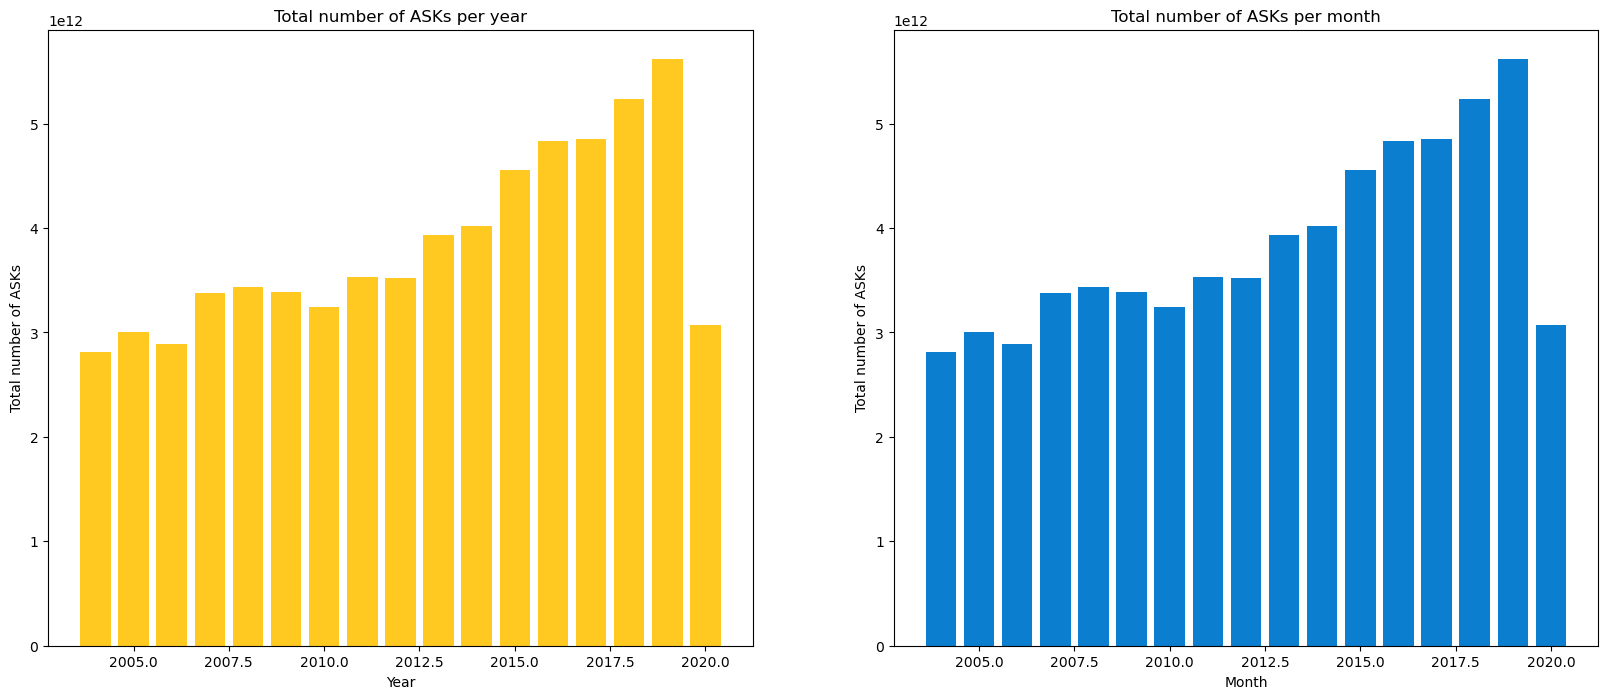

In [128]:
# Group the data by year and month
grouped_by_year = df.groupby("Year").sum()["Total ASKs"]
grouped_by_month = df.groupby("Month").sum()["Total ASKs"]



fig, ax = plt.subplots(1,2,figsize=(20,8))

# Plot the data as a bar chart for years
ax[0].bar(grouped_by_year.index, grouped_by_year.values, color='#ffc922')
ax[0].set_title('Total number of ASKs per year')
ax[0].set_ylabel('Total number of ASKs')
ax[0].set_xlabel('Year')
# Plot the data as a bar chart for months
ax[1].bar(grouped_by_year.index, grouped_by_year.values, color='#0C7ECF')
ax[1].set_title('Total number of ASKs per month')
ax[1].set_ylabel('Total number of ASKs')
ax[1].set_xlabel('Month')
## Display result
plt.show()

<Figure size 1000x1000 with 0 Axes>

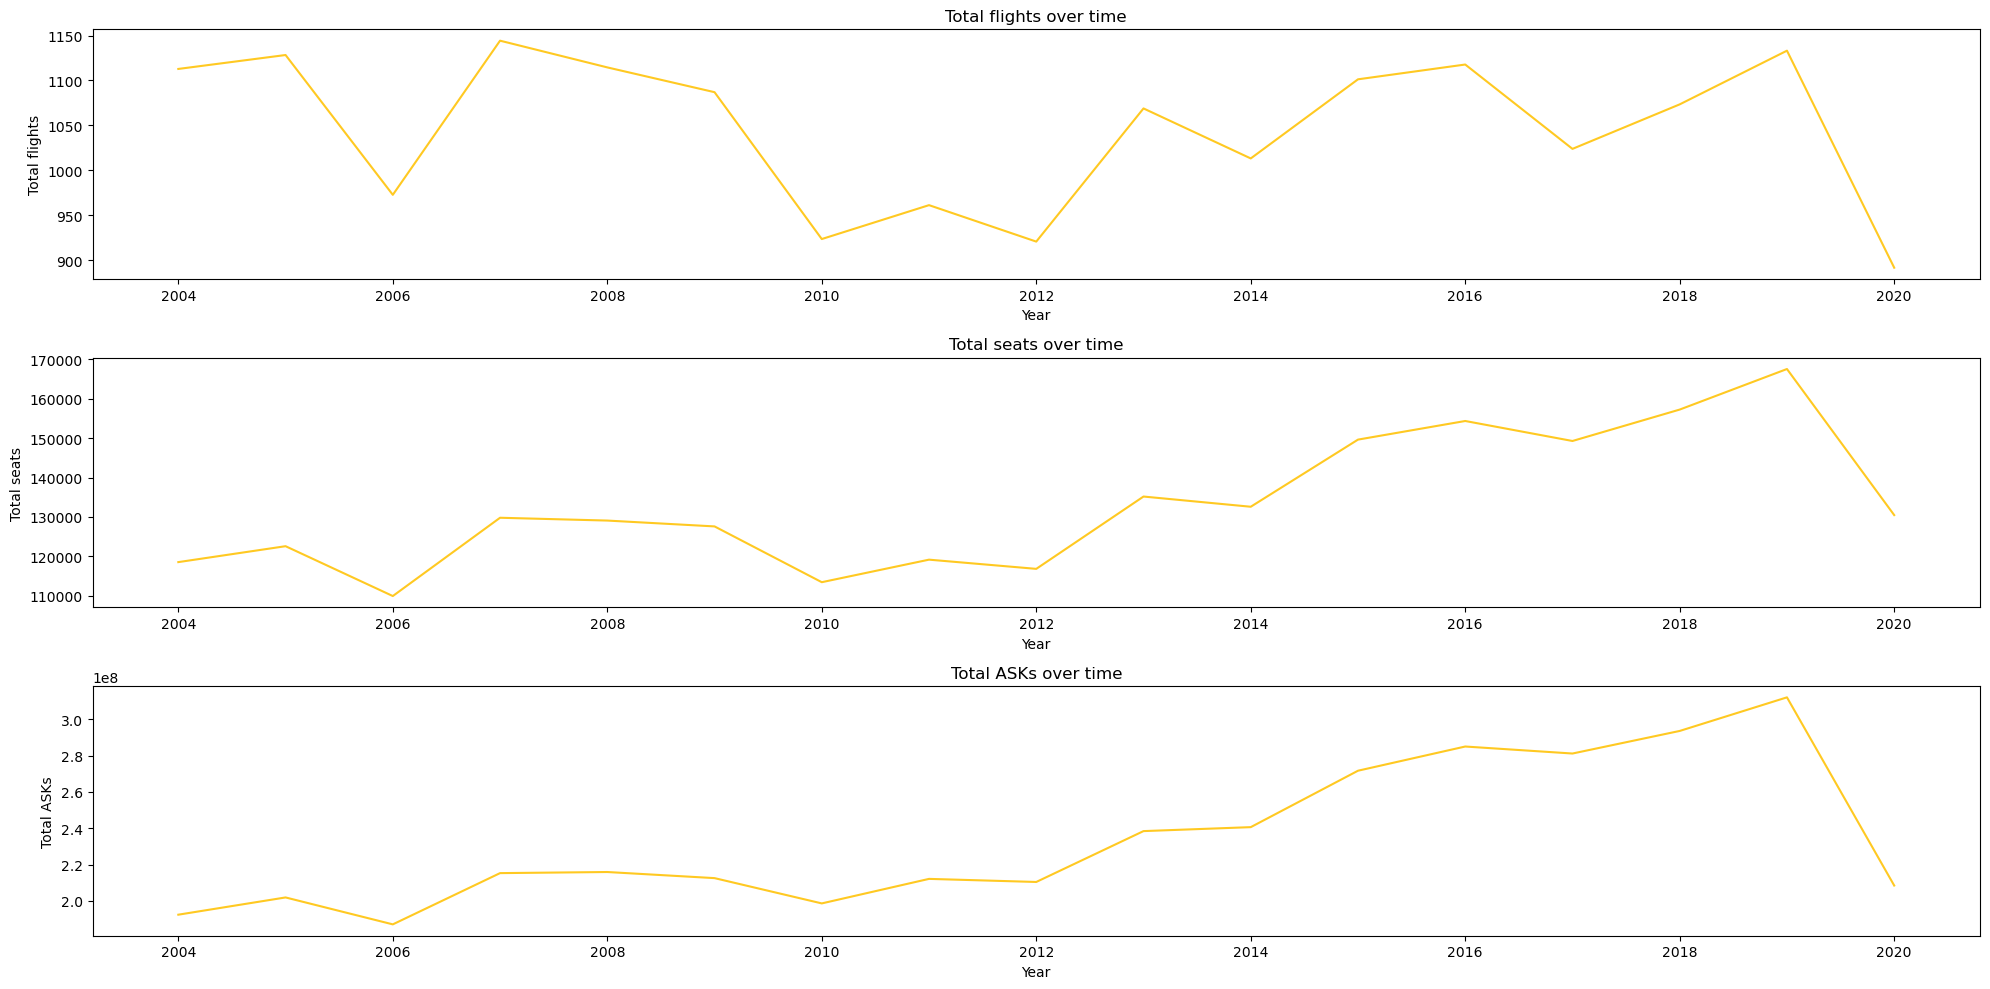

In [57]:
##Figure size:
plt.figure(figsize=(10,10))

## Create subplot figure with 3 subplots
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, figsize=(20,10))

## Plot Total flights
sns.lineplot(x='Year', y='Total flights', data=df, ax=ax1, color='#ffc922', ci=None)
ax1.set_title("Total flights over time")

## Plot Total seats
sns.lineplot(x='Year', y='Total seats', data=df, ax=ax2, color='#ffc922', ci=None)
ax2.set_title("Total seats over time")

## Plot Total ASKs
sns.lineplot(x='Year', y='Total ASKs', data=df, ax=ax3, color='#ffc922', ci=None)
ax3.set_title("Total ASKs over time")

## Adjust the subplots to fit in the figure
plt.tight_layout()  

## Show plot
plt.show()


<Figure size 1000x1000 with 0 Axes>

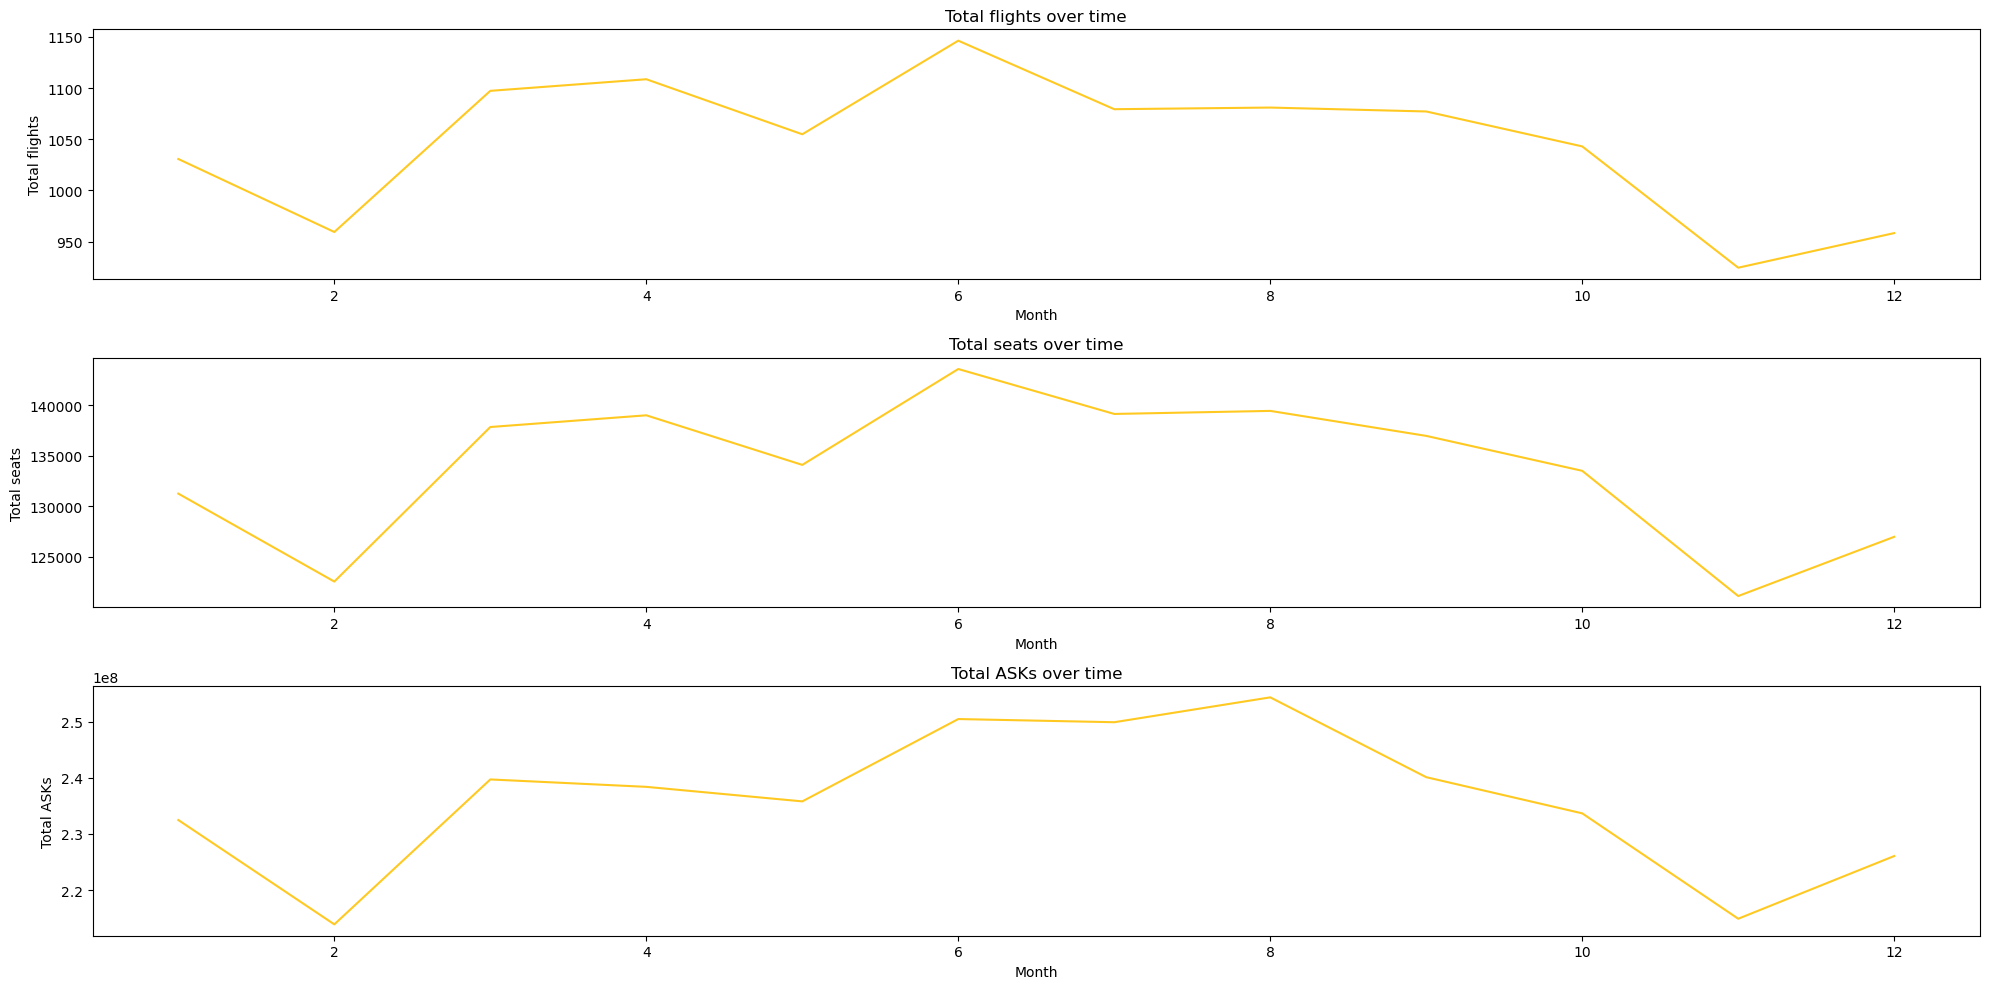

In [58]:
##Figure size:
plt.figure(figsize=(10,10))

## Create subplot figure with 3 subplots
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, figsize=(20,10))

## Plot Total flights
sns.lineplot(x='Month', y='Total flights', data=df, ax=ax1, color='#ffc922', ci=None)
ax1.set_title("Total flights over time")

## Plot Total seats
sns.lineplot(x='Month', y='Total seats', data=df, ax=ax2, color='#ffc922', ci=None)
ax2.set_title("Total seats over time")

## Plot Total ASKs
sns.lineplot(x='Month', y='Total ASKs', data=df, ax=ax3, color='#ffc922', ci=None)
ax3.set_title("Total ASKs over time")

## Adjust the subplots to fit in the figure
plt.tight_layout()  

## Show plot
plt.show()

<div class="alert alert-success">
<b>Seasonal Decomposition</b>

- In time series analysis, the seasonal decomposition of time series data is a process of separating out the seasonal and cyclical components from the irregular component of a time series. The result of this process is typically represented as the trend, seasonal, and residual components.

    - **Trend**: The trend component represents the underlying structure of the data over time, which can be either linear or non-linear. It captures the long-term changes in the data, such as upward or downward trends, over a period of time.

    - **Seasonal**: The seasonal component represents the repeating patterns in the data that occur at regular intervals, such as daily, weekly, or annually. This component is used to capture the regular fluctuations in the data, such as holiday seasons or other regularly recurring events.

    - **Residual**: The residual component represents the random or unsystematic fluctuations in the data that are not captured by the trend or seasonal components. This component is used to capture any irregular fluctuations in the data that are not explained by the trend or seasonal components. It can also be used to identify outliers or errors in the data.
</div>

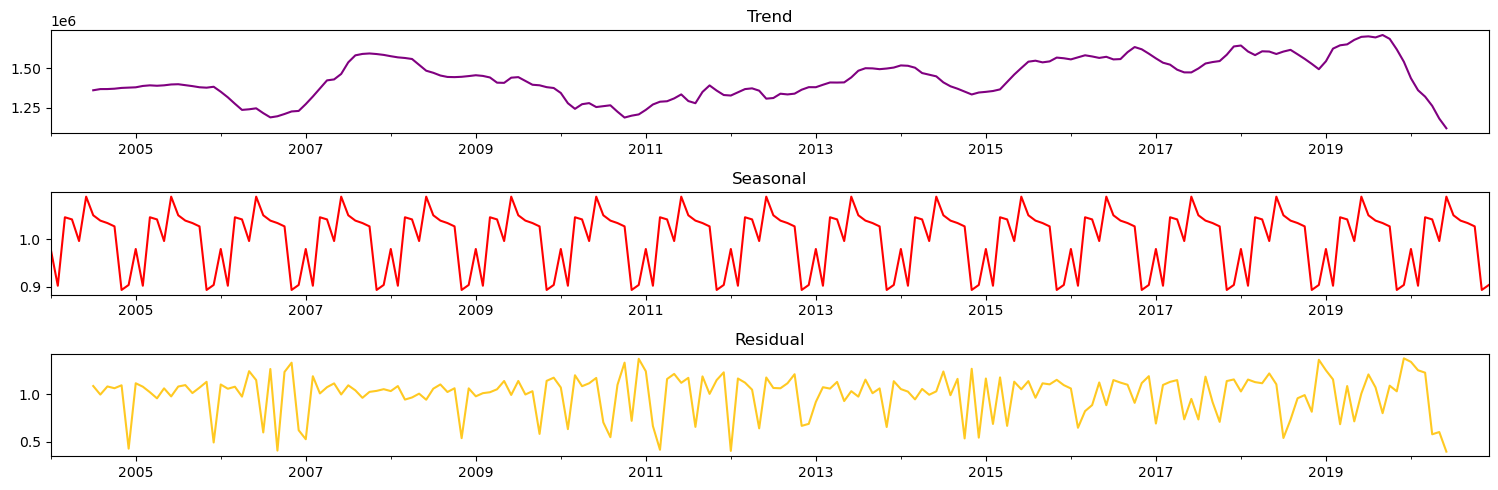

In [59]:
## Group the data by year and month and aggregate the number of flights for each group.
df_flights = df[["Year", "Month", "Total flights"]].groupby(["Year", "Month"]).sum().reset_index()

## create a datetime index for the resulting df combining the year and month columns and converting the result to a datetime format.
df_flights.index = pd.to_datetime(df_flights[["Year", "Month"]].apply(lambda x: f"{x[0]}-{x[1]}-01", axis=1))

## Decompose the time series data in df_flights["Total flights"] into its seasonal, trend, and residual components
result = seasonal_decompose(df_flights["Total flights"], model='multiplicative',)

##Figure size & subplots
fig, axs = plt.subplots(3, figsize=(15,5))

result.trend.plot(color='purple', ax=axs[0])
axs[0].set_title("Trend");

result.seasonal.plot(color='red', ax=axs[1])
axs[1].set_title("Seasonal");

result.resid.plot(color='#ffc922', ax=axs[2])
axs[2].set_title("Residual");

## Adjust the subplots to fit in the figure
plt.tight_layout()  

## Show plot
plt.show()



In [60]:
# generate country code  based on country name 
def alpha3code(column):
    CODE=[]
    for country in column:
        try:
            code=pycountry.countries.get(name=country).alpha_3
           # .alpha_3 means 3-letter country code 
           # .alpha_2 means 2-letter country code
            CODE.append(code)
        except:
            CODE.append('None')
    return CODE# create a column for code 


In [61]:
fligtsCODE = df[['Origin Country', 'Origin Continent', 'Destination Country_Name', 
                      'Destination Continent', 'Total flights', 'Total seats', 'Total ASKs']]
fligtsCODE


,Origin Country,Origin Continent,Destination Country_Name,Destination Continent,Total flights,Total seats,Total ASKs
0,United Kingdom,Europe,Spain,Europe,9032.0,1531683.0,2.447559e+09
1,Lebanon,Middle East,Belgium,Europe,5.0,760.0,2.389940e+06
2,Switzerland,Europe,France,Europe,1471.0,158661.0,6.653345e+07
3,Israel,Middle East,Czech Republic,Europe,117.0,23366.0,6.155764e+07
4,Albania,Europe,Turkey,Europe,80.0,12854.0,9.837347e+06
...,...,...,...,...,...,...,...
276977,Iraq,Middle East,Netherlands,Europe,4.0,744.0,2.635372e+06
276978,Cyprus,Europe,Austria,Europe,64.0,9519.0,1.940961e+07
276979,Panama,Central America,United States,North America,442.0,63061.0,1.612440e+08
276980,Russian Federation,Europe,Belgium,Europe,90.0,13422.0,3.014739e+07


In [62]:
fligtsCODE = fligtsCODE.copy()
fligtsCODE['CODE_O']=alpha3code(fligtsCODE['Origin Country'])
fligtsCODE['CODE_D']=alpha3code(fligtsCODE['Destination Country_Name'])
fligtsCODE

,Origin Country,Origin Continent,Destination Country_Name,Destination Continent,Total flights,Total seats,Total ASKs,CODE_O,CODE_D
0,United Kingdom,Europe,Spain,Europe,9032.0,1531683.0,2.447559e+09,GBR,ESP
1,Lebanon,Middle East,Belgium,Europe,5.0,760.0,2.389940e+06,LBN,BEL
2,Switzerland,Europe,France,Europe,1471.0,158661.0,6.653345e+07,CHE,FRA
3,Israel,Middle East,Czech Republic,Europe,117.0,23366.0,6.155764e+07,ISR,None
4,Albania,Europe,Turkey,Europe,80.0,12854.0,9.837347e+06,ALB,TUR
...,...,...,...,...,...,...,...,...,...
276977,Iraq,Middle East,Netherlands,Europe,4.0,744.0,2.635372e+06,IRQ,NLD
276978,Cyprus,Europe,Austria,Europe,64.0,9519.0,1.940961e+07,CYP,AUT
276979,Panama,Central America,United States,North America,442.0,63061.0,1.612440e+08,PAN,USA
276980,Russian Federation,Europe,Belgium,Europe,90.0,13422.0,3.014739e+07,RUS,BEL


In [66]:
# first let us merge geopandas data with our data
# 'naturalearth_lowres' is geopandas datasets so we can use it directly
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))# rename the columns so that we can merge with our data
world.columns=['pop_est', 'continent', 'name', 'CODE', 'gdp_md_est', 'geometry']# then merge with our data
world

,pop_est,continent,name,CODE,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,6944975.0,Europe,Serbia,SRB,51475,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,622137.0,Europe,Montenegro,MNE,5542,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1794248.0,Europe,Kosovo,-99,7926,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1394973.0,North America,Trinidad and Tobago,TTO,24269,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


In [67]:
# We call folium's library to build a map
WORLD_map = folium.Map(location=[0, 0], zoom_start=2) # in location we must add the city's coordinates

# Create a choropleth layer using the flight counts as the fill color
folium.Choropleth(
    geo_data=world,
    data=fligtsCODE,
    columns=['CODE_D', 'Total flights'],
    key_on='feature.properties.CODE',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Number of Flights'
).add_to(WORLD_map)


# Display the map
WORLD_map

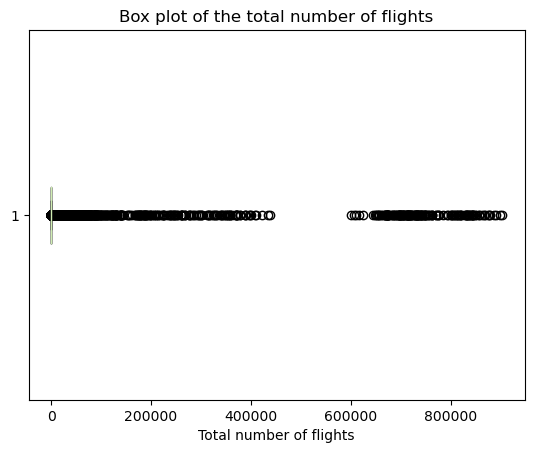

In [69]:
# Plot the box plot
plt.boxplot(df["Total flights"], vert=False)
plt.xlabel("Total number of flights")
plt.title("Box plot of the total number of flights")
plt.show()

In [68]:
df.groupby(['Origin Country', 'Destination Country_Name', 'Year', 'Month']).sum().sort_values(by='Total flights', ascending= False)

Destination Country  \
Origin Country Destination Country_Name Year Month                        
United States  United States            2005 8                       17   
                                             7                       17   
                                        2004 8                       17   
                                        2005 3                       17   
                                        2004 7                       17   
...                                                                 ...   
Kiribati       United States            2010 5                       17   
Barbados       Italy                    2006 7                        7   
Kiribati       United States            2008 10                      17   
Barbados       Italy                    2006 12                       7   
Zimbabwe       United Kingdom           2012 3                       15   

                                                    Total flights  \
Origin Country Destination Country_Name Year Month                  
United States  United States            2005 8           902944.0   
                                             7           897853.0   
                                        2004 8           890930.0   
                                        2005 3           886125.0   
                                        2004 7           877824.0   
...                                                           ...   
Kiribati       United States            2010 5                1.0   
Barbados       Italy                    2006 7                1.0   
Kiribati       United States            2008 10               1.0   
Barbados       Italy                    2006 12               1.0   
Zimbabwe       United Kingdom           2012 3                1.0   

                                                    Total seats    Total ASKs  
Origin Country Destination Country_Name Year Month                             
United States  United States            2005 8       82547758.0  1.058692e+11  
                                             7       82636320.0  1.066489e+11  
                                        2004 8       81387713.0  1.047990e+11  
                                        2005 3       81811153.0  1.032731e+11  
                                        2004 7       80450994.0  1.041122e+11  
...                                                         ...           ...  
Kiribati       United States            2010 5            112.0  2.397280e+05  
Barbados       Italy                    2006 7            241.0  1.756969e+06  
Kiribati       United States            2008 10           112.0  2.397280e+05  
Barbados       Italy                    2006 12           311.0  2.267292e+06  
Zimbabwe       United Kingdom           2012 3            197.0  1.622932e+06  

[272330 rows x 4 columns]

In [ ]:
##Group by Nom districte and lloguer mig, and then we see from the rest of variables the min an max values
##The level columns grouped by are renamed
OriginDestCountry_minmax = df.groupby(['Origin Country', 'Destination Country_Name']).agg(['max', 'min']).rename_axis(['OriginCountry', 'DestiCountry'])
OriginDestCountry_minmax[['Year', 'Month', 'Total flights', 'Total seats', 'Total ASKs']]
                                                                                              


In [74]:
mostFrequDestCountry = df.groupby(['Destination Country_Name']).sum().sort_values(by = 'Total flights', ascending=False).head(20)
mostFrequDestCountry

,Year,Month,Destination Country,Total flights,Total seats,Total ASKs
Destination Country_Name,,,,,,
United States,32318771,104560,273071,131484130.0,1.381130e+10,2.442581e+13
China,20165852,65372,0,40752486.0,6.518840e+09,9.099257e+12
Canada,19633032,63473,175608,14266409.0,1.116013e+09,2.255863e+12
United Kingdom,32429393,104766,241770,13403112.0,1.922421e+09,4.264514e+12
Germany,31955999,103041,79415,12268249.0,1.780488e+09,3.230014e+12
Spain,23287729,75857,150436,10151706.0,1.542972e+09,2.450853e+12
India,16712774,54104,8306,10049555.0,1.593915e+09,2.338816e+12
France,36342045,117813,198682,9399303.0,1.320546e+09,2.583095e+12
Italy,26822109,86343,93324,8374954.0,1.250605e+09,1.581257e+12


In [75]:
df.groupby(['Year', 'Month']).sum().sort_values(by='Total flights', ascending=False).head(10)

Destination Country  Total flights  Total seats    Total ASKs
Year Month                                                               
2019 7                    17561      2154796.0  315080964.0  5.729272e+11
2018 5                    16939      1945872.0  278068427.0  4.933487e+11
2019 12                   17094      1916974.0  279429944.0  5.002150e+11
2018 6                    17117      1908968.0  278590876.0  4.944237e+11
2019 1                    17050      1890386.0  273924674.0  4.909583e+11
2020 1                    16863      1884326.0  273669957.0  5.052406e+11
2019 8                    17398      1882952.0  278837612.0  5.437318e+11
     10                   17545      1882400.0  273097327.0  4.936839e+11
2017 8                    16277      1880384.0  265175915.0  4.879468e+11
2016 7                    17011      1874100.0  259064993.0  4.972609e+11

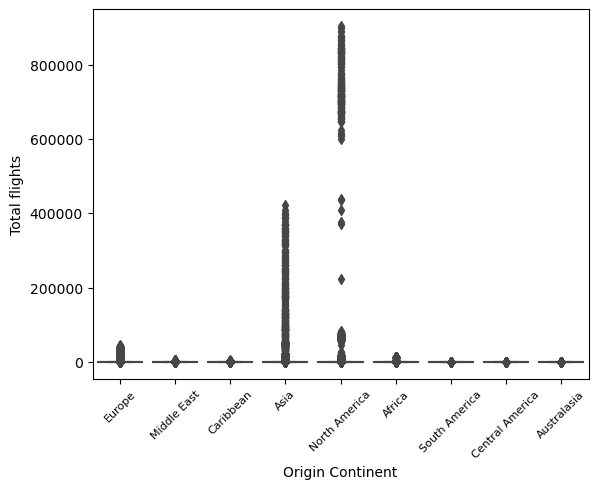

In [76]:
sns.boxplot(x = df['Origin Continent'], y = df['Total flights'])
plt.xticks(fontsize=8, rotation = 45);

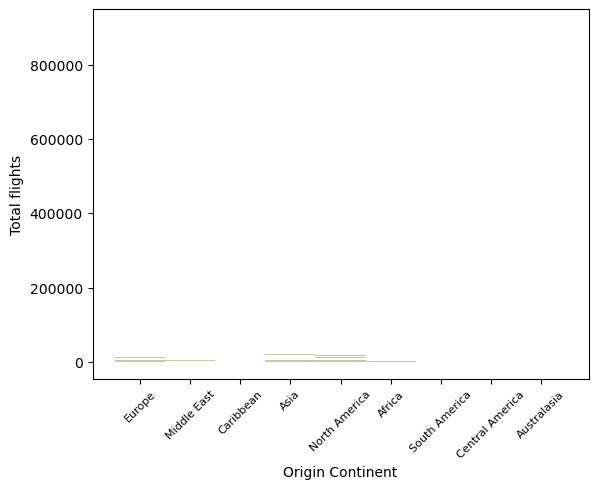

In [77]:
sns.histplot(x = df['Origin Continent'], y = df['Total flights'], kde=True)
plt.xticks(fontsize=8, rotation = 45);

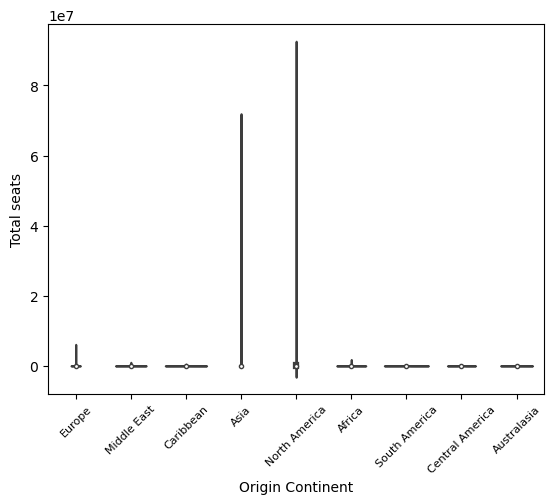

In [78]:
sns.violinplot(data = df, x = 'Origin Continent', y='Total seats', palette='Set1')
plt.xticks(fontsize=8, rotation = 45);